<h1><center> Blood Cell Classification using Deep Learning</center></h1>

<p>The diagnosis of blood-based diseases often involves identifying and characterizing patient blood samples. Automated methods to detect and classify blood cell subtypes have important medical applications. In this notebook we will create a Convolutional Neural Network to identify and classify the different types of white blood cells from the images. The notebook uses images from a BCCD Dataset and contains around 12500 images in the training set. We have used 59 images from the dataset to use them for testing purpose.</p>

# Importing the dataset

In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Blood_cell_image_dataset.zip"
!unzip -qo Blood_cell_image_dataset.zip
!rm Blood_cell_image_dataset.zip

--2021-07-08 15:16:53--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Blood_cell_image_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.160.59
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.160.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105253880 (100M) [application/x-zip-compressed]
Saving to: ‘Blood_cell_image_dataset.zip’

Blood_cell_image_da 100%[===================>] 100.38M  84.7MB/s    in 1.2s    

2021-07-08 15:16:54 (84.7 MB/s) - ‘Blood_cell_image_dataset.zip’ saved [105253880/105253880]



# Importing the necessary libraries

In [2]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Displaying the data

<p>We can see in the following cell that the image is rgb</p>

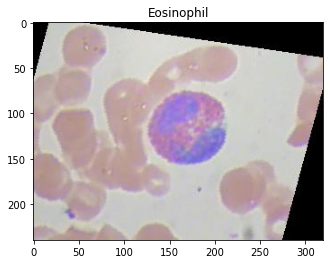

In [3]:
img = cv2.imread("Blood_cell_image_dataset/images/TRAIN/EOSINOPHIL/_0_1169.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
plt.title("Eosinophil")
plt.imshow(img)

In [4]:
img_width = 64
img_height = 64

# Preparing the data

<p>We have used ImageDataGenerator from keras, in the subsequent cells, to fetch the images along with their labels to train the neural network</p>

In [5]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)

In [6]:
train_data_generator = datagen.flow_from_directory(directory="Blood_cell_image_dataset/images/TRAIN/", target_size = (img_width, img_height), color_mode="rgb", class_mode="categorical", batch_size = 16, shuffle=True ,subset = "training")

Found 9950 images belonging to 4 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory="Blood_cell_image_dataset/images/TRAIN/", target_size = (img_width, img_height),  color_mode="rgb", class_mode="categorical", batch_size = 16, shuffle=True, subset = "validation")

Found 2486 images belonging to 4 classes.


# The labels
<p>We will use one hot encoding here as our data is categorical in nature</p>

In [8]:
train_data_generator.next()[1]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

# The CNN Model

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(4, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [11]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [12]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)]

In [13]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=100, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/100
622/622 [==============================] - 14s 22ms/step - loss: 1.3885 - accuracy: 0.2582 - val_loss: 1.3845 - val_accuracy: 0.2679
Epoch 2/100
622/622 [==============================] - 13s 21ms/step - loss: 1.2454 - accuracy: 0.3774 - val_loss: 1.0821 - val_accuracy: 0.4598
Epoch 3/100
622/622 [==============================] - 13s 21ms/step - loss: 1.0172 - accuracy: 0.4954 - val_loss: 0.9667 - val_accuracy: 0.5201
Epoch 4/100
622/622 [==============================] - 13s 21ms/step - loss: 0.9527 - accuracy: 0.5419 - val_loss: 0.8120 - val_accuracy: 0.6681
Epoch 5/100
622/622 [==============================] - 13s 21ms/step - loss: 0.7045 - accuracy: 0.7008 - val_loss: 0.6696 - val_accuracy: 0.7245
Epoch 6/100
622/622 [==============================] - 13s 21ms/step - loss: 0.5876 - accuracy: 0.7567 - val_loss: 0.5918 - val_accuracy: 0.7486
Epoch 7/100
622/622 [==============================] - 13s 21ms/step - loss: 0.5233 - accuracy: 0.7825 - val_loss: 0.5234 - val_ac

# Preparing the test data

<p>In the following cells we will prepare the unseen data for testing and evaluate the model performance on the unseen data</p>

In [14]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Blood_cell_image_dataset/images/TEST/", target_size = (img_width, img_height), color_mode="rgb", class_mode="categorical", batch_size = 16, subset = "training")

Found 59 images belonging to 4 classes.


In [15]:
model.evaluate(test_data_generator)

4/4 [==============================] - 0s 18ms/step - loss: 0.4530 - accuracy: 0.7966


[0.45297911763191223, 0.7966101765632629]

# Model accuracy and loss trends

<p>Lets visualize the accuracy and loss trends throughout the training process</p>

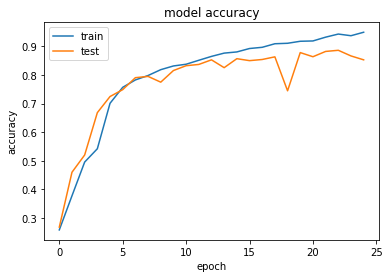

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

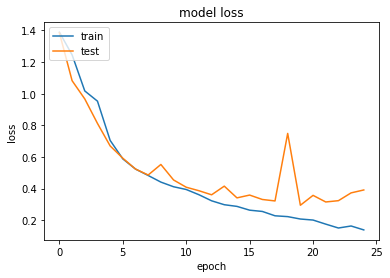

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing the predictions of the model on unseen data

In [18]:
# Getting the predicted classes from one hot encoded predicted outputs

x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(10):
    img = x[i]
    img = img.reshape(-1,64,64,3)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

In [19]:
#Making the Output meaningful using named classes

cell_dict = {0:"EOSINOPHIL", 1:"LYMPHOCYTE", 2:"MONOCYTE", 3:"NEUTROPHIL"}
predictions = {}
actual_val = {}

k=0
for arr in y[:10]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'NEUTROPHIL', 1: 'NEUTROPHIL', 2: 'NEUTROPHIL', 3: 'EOSINOPHIL', 4: 'MONOCYTE', 5: 'NEUTROPHIL', 6: 'NEUTROPHIL', 7: 'NEUTROPHIL', 8: 'EOSINOPHIL', 9: 'NEUTROPHIL'}
PREDICTIONS: {0: 'NEUTROPHIL', 1: 'NEUTROPHIL', 2: 'NEUTROPHIL', 3: 'EOSINOPHIL', 4: 'MONOCYTE', 5: 'NEUTROPHIL', 6: 'NEUTROPHIL', 7: 'NEUTROPHIL', 8: 'NEUTROPHIL', 9: 'NEUTROPHIL'}


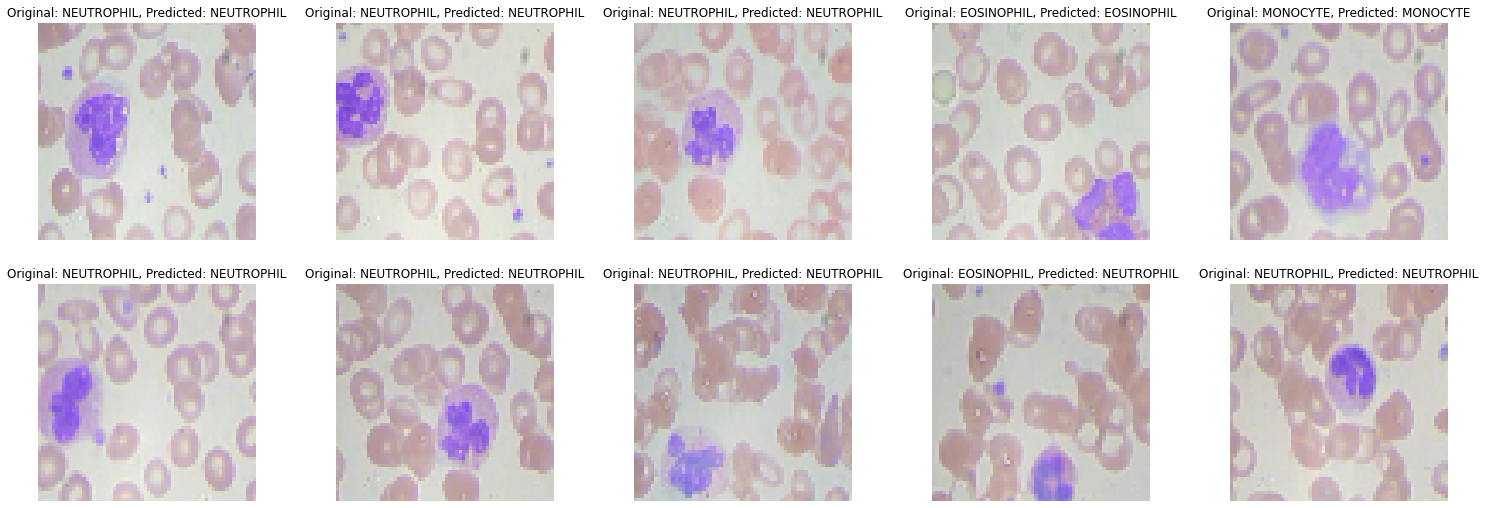

In [20]:
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i])
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()

In [21]:
model.save("blood_cell_classification.h5")